In [1]:
# Cell 1: Imports and Configuration
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import get_config, print_config
from dataset import DataSet, prepare_interaction_pairs

# Get configuration
config = get_config()
print_config(config)

# Set up datasets
davis_dataset = DataSet(config['davis_path'], config['problem_type'], config['max_seq_len'], config['max_smi_len'], 'davis', config['davis_convert_to_log'])
kiba_dataset = DataSet(config['kiba_path'], config['problem_type'], config['max_seq_len'], config['max_smi_len'], 'kiba', config['kiba_convert_to_log'])


Configuration:
  seq_window_lengths: [8, 12]
  smi_window_lengths: [4, 8]
  num_windows: [32, 64, 96]
  num_hidden: 1024
  num_classes: 1
  max_seq_len: 1000
  max_smi_len: 100
  learning_rate: 0.001
  num_epoch: 100
  batch_size: 256
  davis_path: ../data/davis/
  kiba_path: ../data/kiba/
  problem_type: 1
  binary_th: 0.0
  checkpoint_path: 
  log_dir: logs
  model_type: cnn
  davis_convert_to_log: True
  kiba_convert_to_log: False




In [2]:
def analyze_dataset(dataset, name):
    XD, XT, Y, label_row_inds, label_col_inds, test_fold, train_folds = dataset.get_data()

    print(f"\n{'=' * 50}")
    print(f"Exploratory Data Analysis - {name.upper()} Dataset")
    print(f"{'=' * 50}")

    # 1. Dataset Overview
    print("\n1. Dataset Overview")
    print(f"Number of drugs: {XD.shape[0]}")
    print(f"Number of targets: {XT.shape[0]}")
    print(f"Number of interactions: {len(label_row_inds)}")
    print(f"Interaction matrix shape: {Y.shape}")

    # 2. Sample Raw Data
    print("\n2. Sample Raw Data")
    sample_drug_idx = 0
    sample_target_idx = 0
    print(f"Sample Drug SMILES: {list(dataset.ligands.values())[sample_drug_idx][:50]}...")
    print(f"Sample Target Sequence: {list(dataset.proteins.values())[sample_target_idx][:50]}...")
    print(f"Sample Binding Affinity: {Y[sample_drug_idx, sample_target_idx]}")

    # 3. Encoded Data
    print("\n3. Encoded Data")
    print(f"Sample Drug Encoding: {XD[sample_drug_idx][:10]}...")
    print(f"Sample Target Encoding: {XT[sample_target_idx][:10]}...")

    # 4. Data Statistics
    print("\n4. Data Statistics")
    smiles_lengths = [len(s) for s in dataset.ligands.values()]
    protein_lengths = [len(s) for s in dataset.proteins.values()]
    print("SMILES strings:")
    print(f"  Max length: {max(smiles_lengths)}")
    print(f"  Min length: {min(smiles_lengths)}")
    print(f"  Average length: {np.mean(smiles_lengths):.2f}")
    print("Protein sequences:")
    print(f"  Max length: {max(protein_lengths)}")
    print(f"  Min length: {min(protein_lengths)}")
    print(f"  Average length: {np.mean(protein_lengths):.2f}")

    # 5. Binding Affinity Statistics
    print("\n5. Binding Affinity Statistics")
    valid_Y = Y[~np.isnan(Y)]
    print(f"Min value: {np.min(valid_Y):.4f}")
    print(f"Max value: {np.max(valid_Y):.4f}")
    print(f"Mean value: {np.mean(valid_Y):.4f}")
    print(f"Median value: {np.median(valid_Y):.4f}")

    # 6. Data Split Information
    print("\n6. Data Split Information")
    print(f"Number of folds: {len(train_folds)}")
    print(f"Test set size: {len(test_fold)}")
    print(f"Average train set size: {np.mean([len(fold) for fold in train_folds]):.0f}")
    
    # 8. Interaction Matrix Sparsity
    print("\n8. Interaction Matrix Sparsity")
    sparsity = np.sum(np.isnan(Y)) / (Y.shape[0] * Y.shape[1])
    print(f"Interaction matrix sparsity: {sparsity:.2%}")

    # 9. Sample Interaction Pair
    print("\n9. Sample Interaction Pair")
    sample_pair_idx = 0
    sample_drug_idx = label_row_inds[sample_pair_idx]
    sample_target_idx = label_col_inds[sample_pair_idx]
    print(f"Drug SMILES: {list(dataset.ligands.values())[sample_drug_idx][:50]}...")
    print(f"Target Sequence: {list(dataset.proteins.values())[sample_target_idx][:50]}...")
    print(f"Binding Affinity: {Y[sample_drug_idx, sample_target_idx]}")
    print(f"Encoded Drug: {XD[sample_drug_idx][:10]}...")
    print(f"Encoded Target: {XT[sample_target_idx][:10]}...")

    # 7. Visualizations
    print("\n7. Visualizations")
    print("(Plots will be displayed separately)")

    # Binding Affinity Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(valid_Y, kde=True)
    plt.title(f"Distribution of Binding Affinity Values - {name.upper()}")
    plt.xlabel("Binding Affinity")
    plt.ylabel("Count")
    plt.show()

    # SMILES Length Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(smiles_lengths, kde=True)
    plt.title(f"Distribution of SMILES String Lengths - {name.upper()}")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.show()

    # Protein Sequence Length Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(protein_lengths, kde=True)
    plt.title(f"Distribution of Protein Sequence Lengths - {name.upper()}")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.show()

Reading davis dataset from ../data/davis/
Parsing davis dataset

Exploratory Data Analysis - DAVIS Dataset

1. Dataset Overview
Number of drugs: 68
Number of targets: 442
Number of interactions: 30056
Interaction matrix shape: (68, 442)

2. Sample Raw Data
Sample Drug SMILES: CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)...
Sample Target Sequence: MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDE...
Sample Binding Affinity: 7.366531544420414

3. Encoded Data
Sample Drug Encoding: [20. 20.  8. 18. 20. 11. 20. 18. 20.  4.]...
Sample Target Encoding: [11. 10. 10.  7.  7.  5. 17. 18. 18.  4.]...

4. Data Statistics
SMILES strings:
  Max length: 92
  Min length: 39
  Average length: 62.78
Protein sequences:
  Max length: 2549
  Min length: 244
  Average length: 788.95

5. Binding Affinity Statistics
Min value: 5.0000
Max value: 10.7959
Mean value: 5.4515
Median value: 5.0000

6. Data Split Information
Number of folds: 5
Test set size: 5010
Average train set size: 5009

8. Interaction 

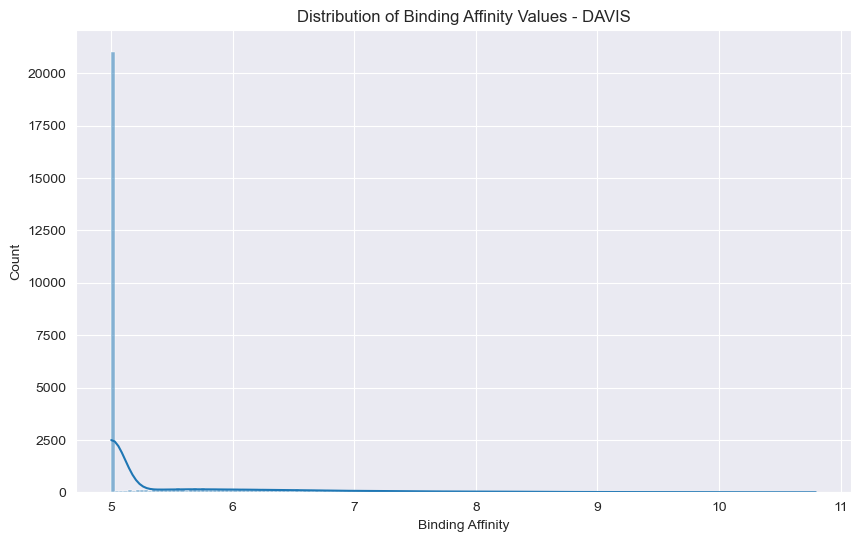

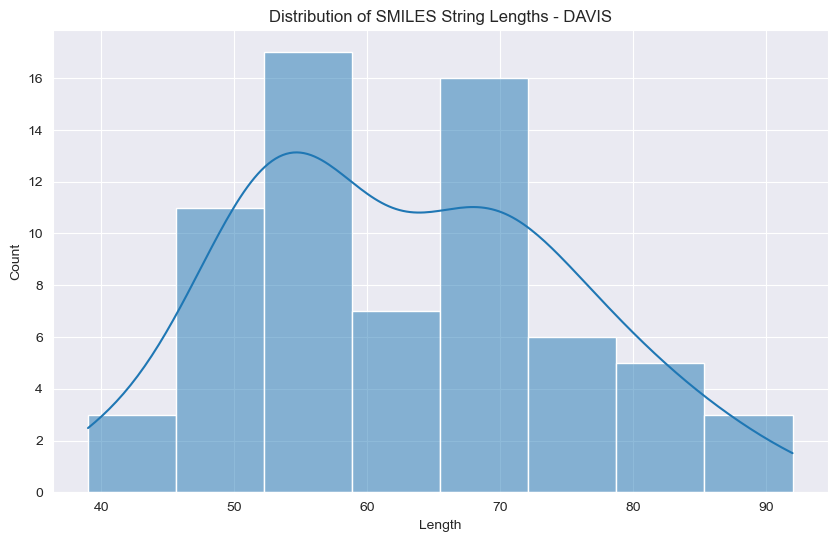

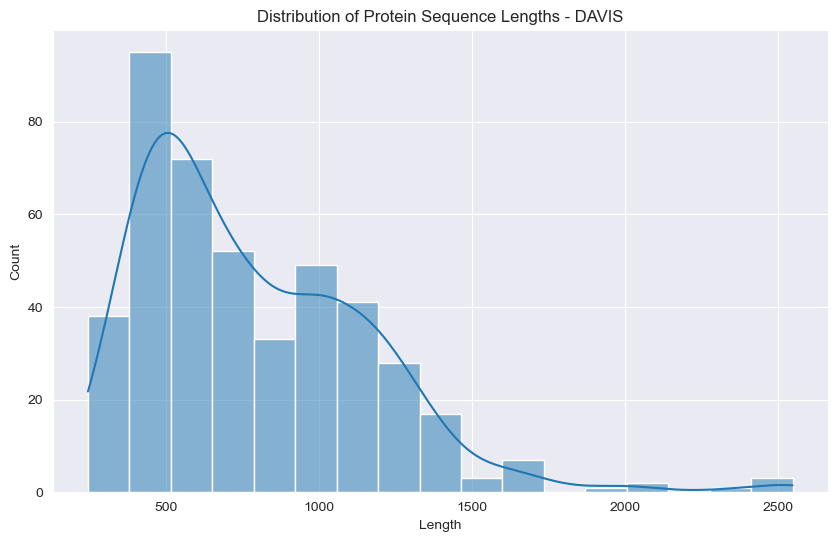

In [3]:
# Cell 3: Analyze Davis Dataset
analyze_dataset(davis_dataset, "Davis")

Reading kiba dataset from ../data/kiba/
Parsing kiba dataset

Exploratory Data Analysis - KIBA Dataset

1. Dataset Overview
Number of drugs: 2111
Number of targets: 229
Number of interactions: 118254
Interaction matrix shape: (2111, 229)

2. Sample Raw Data
Sample Drug SMILES: COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl...
Sample Target Sequence: MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACK...
Sample Binding Affinity: 11.1

3. Encoded Data
Sample Drug Encoding: [20. 31. 20.  8. 18. 20.  4. 20. 18. 20.]...
Sample Target Encoding: [11. 20. 22. 10. 20.  4.  1.  1. 10.  6.]...

4. Data Statistics
SMILES strings:
  Max length: 590
  Min length: 20
  Average length: 58.06
Protein sequences:
  Max length: 4128
  Min length: 215
  Average length: 728.96

5. Binding Affinity Statistics
Min value: 0.0000
Max value: 17.2002
Mean value: 11.7199
Median value: 11.5000

6. Data Split Information
Number of folds: 5
Test set size: 19709
Average train set size: 19709

8. Interaction Matrix Spars

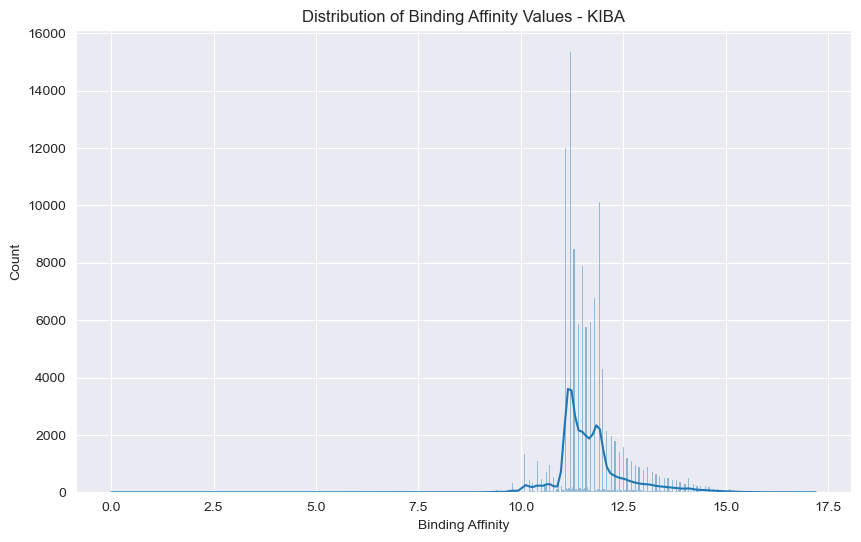

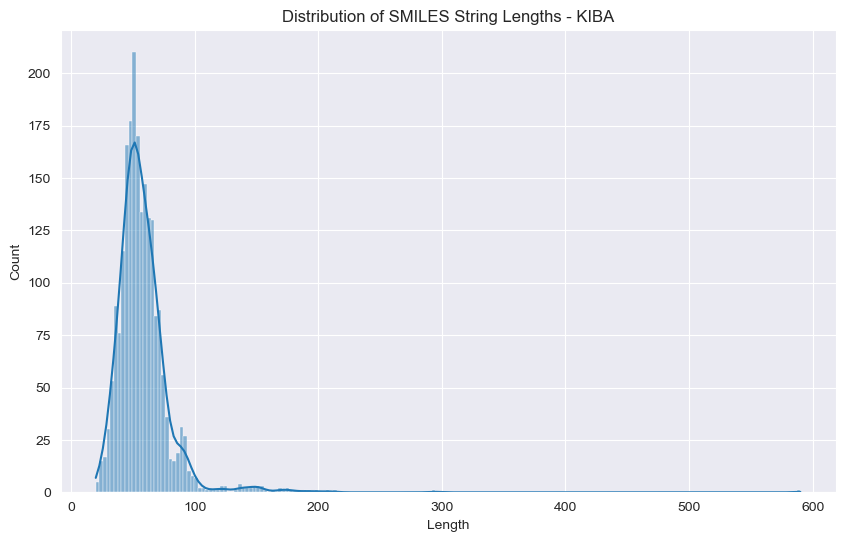

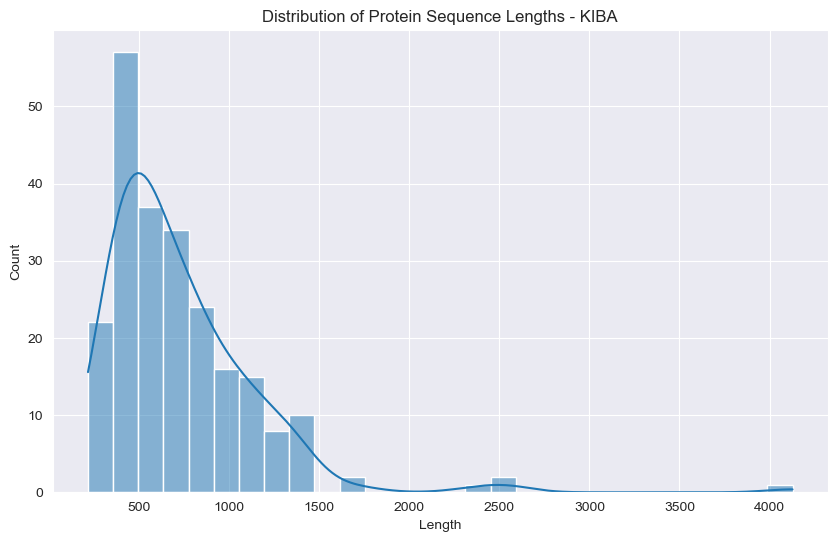

In [4]:
# Cell 4: Analyze KIBA Dataset
analyze_dataset(kiba_dataset, "KIBA")

In [5]:
# Cell 5: Comparative Analysis
print("\n" + "=" * 50)
print("Comparative Analysis")
print("=" * 50)

davis_XD, davis_XT, davis_Y, _, _, _, _ = davis_dataset.get_data()
kiba_XD, kiba_XT, kiba_Y, _, _, _, _ = kiba_dataset.get_data()

print(f"\nDataset Sizes:")
print(f"Davis: {davis_XD.shape[0]} drugs, {davis_XT.shape[0]} targets, {np.sum(~np.isnan(davis_Y))} interactions")
print(f"KIBA: {kiba_XD.shape[0]} drugs, {kiba_XT.shape[0]} targets, {np.sum(~np.isnan(kiba_Y))} interactions")

print(f"\nBinding Affinity Range:")
print(f"Davis: {np.min(davis_Y[~np.isnan(davis_Y)]):.4f} to {np.max(davis_Y[~np.isnan(davis_Y)]):.4f}")
print(f"KIBA: {np.min(kiba_Y[~np.isnan(kiba_Y)]):.4f} to {np.max(kiba_Y[~np.isnan(kiba_Y)]):.4f}")

print(f"\nInteraction Matrix Sparsity:")
print(f"Davis: {np.sum(np.isnan(davis_Y)) / davis_Y.size:.2%}")
print(f"KIBA: {np.sum(np.isnan(kiba_Y)) / kiba_Y.size:.2%}")


Comparative Analysis
Reading davis dataset from ../data/davis/
Parsing davis dataset
Reading kiba dataset from ../data/kiba/
Parsing kiba dataset

Dataset Sizes:
Davis: 68 drugs, 442 targets, 30056 interactions
KIBA: 2111 drugs, 229 targets, 118254 interactions

Binding Affinity Range:
Davis: 5.0000 to 10.7959
KIBA: 0.0000 to 17.2002

Interaction Matrix Sparsity:
Davis: 0.00%
KIBA: 75.54%


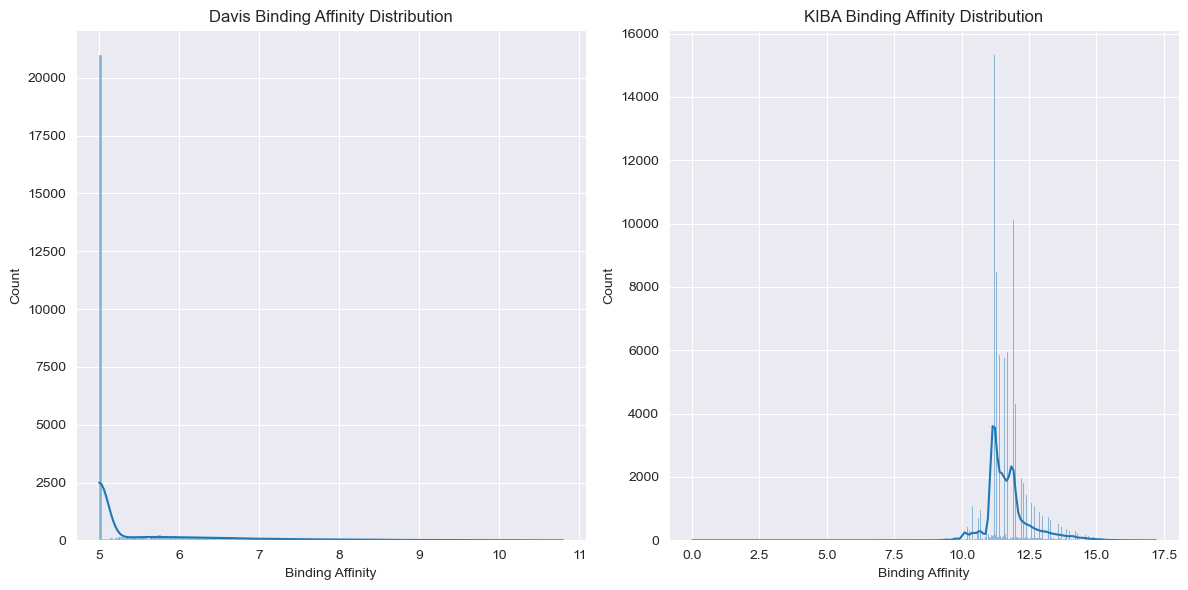


EDA Complete. Please review the printed information and visualizations.


In [6]:
# Cell 6: Comparative Visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(davis_Y[~np.isnan(davis_Y)], kde=True)
plt.title("Davis Binding Affinity Distribution")
plt.xlabel("Binding Affinity")
plt.subplot(1, 2, 2)
sns.histplot(kiba_Y[~np.isnan(kiba_Y)], kde=True)
plt.title("KIBA Binding Affinity Distribution")
plt.xlabel("Binding Affinity")
plt.tight_layout()
plt.show()

print("\nEDA Complete. Please review the printed information and visualizations.")